In [1]:
import lbg_forecast.priors_gp_massfunc as gpmf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import lbg_forecast.utils as utils
import emcee

In [2]:
mass_function_prior = gpmf.MassFunctionPrior('.', mean=False)

cell step:  0.00125 0.00125


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


(0.0, 3.0)

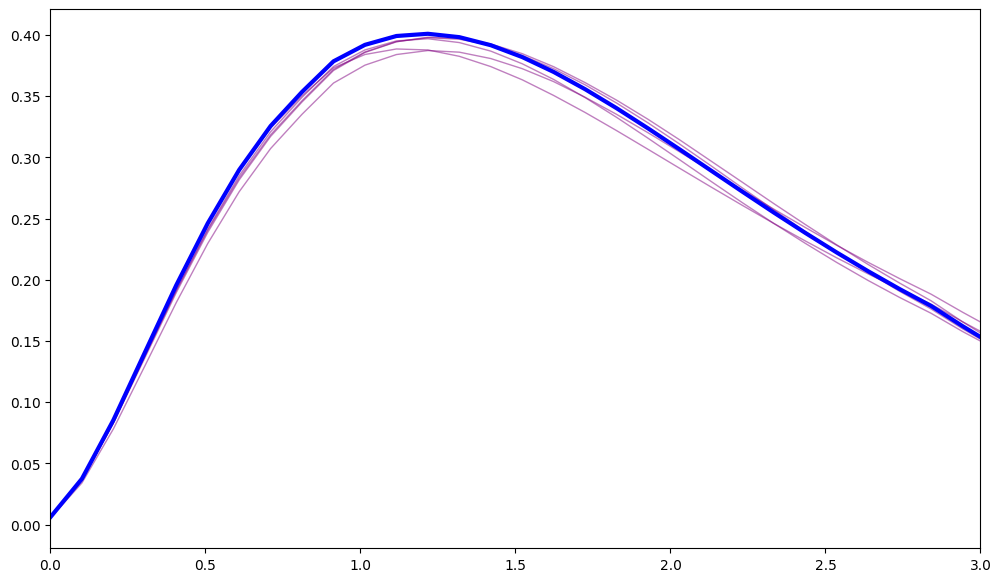

In [ ]:
f, ax =plt.subplots(1, 1, figsize=(12, 6))

logm_test=10

for i in range(5):

    sparams = mass_function_prior.sample_prior()

    n_z=np.empty(0)
    for z in mass_function_prior.z_grid:
        n_z = np.append(n_z, mass_function_prior.number_of_galaxies_in_cell(z, logm_test, sparams, mass_function_prior.dlogm, mass_function_prior.dz))

    norm_nz = n_z/np.trapz(n_z, mass_function_prior.z_grid)
    ax.plot(mass_function_prior.z_grid, norm_nz, lw=1, c='purple', alpha=0.5)

n_z=np.empty(0)
for z in mass_function_prior.z_grid:
    n_z = np.append(n_z, mass_function_prior.number_of_galaxies_in_cell(z, logm_test, mass_function_prior.sample_prior_mean(), mass_function_prior.dlogm, mass_function_prior.dz))

norm_nz = n_z/np.trapz(n_z, mass_function_prior.z_grid)
ax.plot(mass_function_prior.z_grid, norm_nz, lw=3, c='blue', alpha=1.0)
ax.set_xlim(0, 3)
#ax.set_ylim(0, 0.5)

In [4]:
#gals = np.empty(0)
gals_mean = np.empty(0)
#for i in range(2):
#    gals = np.append(gals, mass_function_prior.calculate_number_density_lsst())
#    print(i)

#mean = np.mean(gals)
#std = np.std(gals)

gals_mean = np.append(gals_mean, mass_function_prior.calculate_number_density_lsst_mean())

#print("Total Number Density: ",mean,"+/-",std)
print("Total Mean Number Density: ", gals_mean)


KeyboardInterrupt: 

In [ ]:
z, logm = mass_function_prior.sample_logpdf(200000)

Calculating Galaxy PDF ... 


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


MCMC Sampling ... 
MCMC Sampling Complete.


(array([1003., 1887., 2386., 3089., 3674., 3932., 4136., 4260., 4497.,
        4600., 4932., 5004., 4960., 4930., 4853., 4859., 4932., 4756.,
        4481., 4700., 4499., 4728., 4329., 4244., 4188., 4055., 4006.,
        3913., 3962., 3517., 3590., 3354., 3163., 2958., 3032., 2921.,
        2821., 2856., 2664., 2615., 2436., 2338., 2406., 2160., 2134.,
        2116., 2041., 2098., 1779., 1812., 1724., 1648., 1527., 1534.,
        1465., 1411., 1459., 1351., 1358., 1199., 1251., 1216., 1067.,
        1122., 1009., 1046., 1034., 1032.,  993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9]),
 <BarContainer object of 69 artists>)

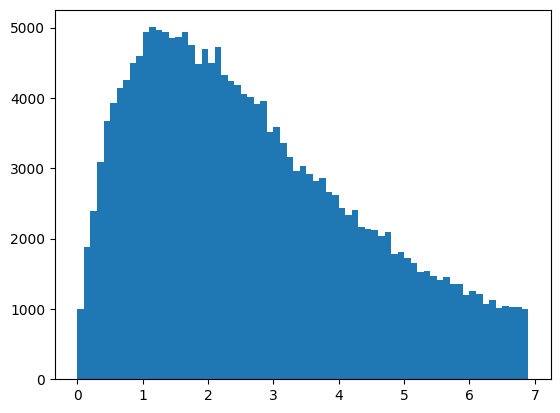

In [ ]:
plt.hist(z, bins=np.arange(0, 7, 0.1))